MSE: 0.6821850572045094
RMSE: 0.8259449480470895
MAE: 0.6362668381367467
MAPE: 0.5934167006983069
R2 Score: 0.9984092556363922


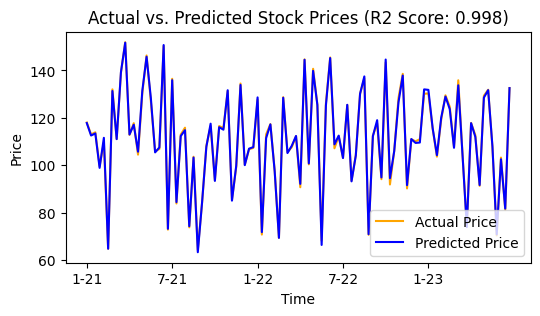

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the stock data from a CSV file
df = pd.read_csv('/content/TATASTEEL.NS (1).csv')

# Extract the feature variables and target variable
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Linear Regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and accuracy (R2 score) of the model
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R2 Score:", r2)

# Generate a line graph of the predicted and actual values
x_axis = np.arange(len(y_test))
plt.figure(figsize=(6,3))
plt.plot(x_axis, y_test, color='orange', label='Actual Price')
plt.plot(x_axis, y_pred, color='blue', label='Predicted Price')
plt.xticks(np.arange(0, len(y_test), len(y_test)/5), ['1-21', '7-21', '1-22', '7-22', '1-23'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f"Actual vs. Predicted Stock Prices (R2 Score: {r2:.3f})")
plt.legend()
plt.show()
